In [ ]:
!git clone https://github.com/Fuchsi94/Traffic-Sign-Data.git

Cloning into 'Traffic-Sign-Data'...
remote: Enumerating objects: 589, done.
remote: Counting objects: 100% (589/589), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 589 (delta 277), reused 573 (delta 261), pack-reused 0
Receiving objects: 100% (589/589), 54.66 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (277/277), done.


In [ ]:
path = '/content/Traffic-Sign-Data/train'

https://docs.python.org/3/library/glob.html

https://docs.python.org/3/library/xml.etree.elementtree.html

In [ ]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [ ]:
xml_list = []
for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text,
                  int(root.find('size')[0].text),
                  int(root.find('size')[1].text),
                  member[0].text,
                  int(member[4][0].text),
                  int(member[4][1].text),
                  int(member[4][2].text),
                  int(member[4][3].text)
                  )
        xml_list.append(value)
column_name = ['filename', 'width', 'height',
                'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)

In [ ]:
xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_5456.jpeg,640,480,tempolimit 50,175,116,254,190
1,IMG_5456.jpeg,640,480,fahrtrichtung rechts,333,105,460,212
2,IMG_1134.jpeg,640,480,vorfahrt gewähren,125,146,168,185
3,IMG_1134.jpeg,640,480,rechts halten,284,176,335,234
4,IMG_1134.jpeg,640,480,tempolimit 30,366,134,401,168
...,...,...,...,...,...,...,...,...
515,IMG_5567.jpeg,640,480,fahrtrichtung rechts,283,196,369,282
516,IMG_5517.jpeg,640,480,rechts halten,385,144,471,223
517,IMG_5517.jpeg,640,480,verengte fahrbahn,145,117,241,203
518,IMG_5537.jpeg,640,480,fahrtrichtung rechts,213,194,298,286


In [ ]:
sorted_xml_df = xml_df.sort_values(by=['class'])
sorted_xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
259,IMG_5363.jpeg,640,480,fahrtrichtung rechts,385,110,436,159
426,IMG_5369.jpeg,640,480,fahrtrichtung rechts,302,172,381,242
216,IMG_5496.jpeg,640,480,fahrtrichtung rechts,257,172,323,233
424,IMG_5493.jpeg,640,480,fahrtrichtung rechts,267,212,331,275
80,IMG_1126.jpeg,640,480,fahrtrichtung rechts,64,131,129,188
...,...,...,...,...,...,...,...,...
489,IMG_1133.jpeg,640,480,vorfahrt gewähren,145,144,190,179
144,IMG_5380.jpeg,640,480,vorfahrt gewähren,214,220,248,261
191,IMG_1135.jpeg,640,480,vorfahrt gewähren,192,107,231,143
61,IMG_5432.jpeg,640,480,vorfahrt gewähren,341,87,466,211


In [ ]:
counts = xml_df['class'].value_counts()

In [ ]:
relative_counts = xml_df['class'].value_counts(normalize=True)

In [ ]:
counts

fahrtrichtung rechts    68
stop                    51
verbot der einfahrt     51
radfahrer               45
vorfahrt gewähren       42
rechts halten           40
verengte fahrbahn       40
fußgängerüberweg        39
lichtzeichenanlage      38
tempolimit 30           37
tempolimit 50           37
parken                  32
Name: class, dtype: int64

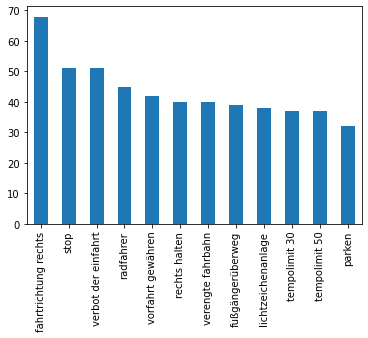

In [ ]:
counts.plot.bar()